# Machine Learning & Statistics 2020 Project

### Power Production Predictions

***

In [1]:
# for neural networks.
import tensorflow.keras as kr
# for numerical arrays
import numpy as np
# for data frames.
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
# for test and train datasets
import sklearn.model_selection as mod

In [2]:
# Plot style.
plt.style.use("bmh")
# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [4]:
data = df.drop([208,340,404,456,490,491,492,493,494,495,496,497,498,499], axis=0)
data.reset_index(inplace=True)

In [5]:
x_train, x_test, y_train, y_test = mod.train_test_split(data['speed'], data['power'], test_size=0.2)

In [12]:
# from topic 7 in the lectures
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="random_normal", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [18]:
# fit the data using the training sub-dataframes
model.fit(data['speed'], data['power'], epochs=100)

Epoch 1/100
16/16 [==============================] - 2s 5ms/step - loss: 16.8253
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 16.7425
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 16.7547
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 16.7157
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 16.7508
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 16.7248
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 16.8125
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 16.7427
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 16.7324
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 16.7744
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 16.7156
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 16.7257
Epoch 13/100
16/16 [=====

16/16 [==============================] - 0s 1ms/step - loss: 16.7272


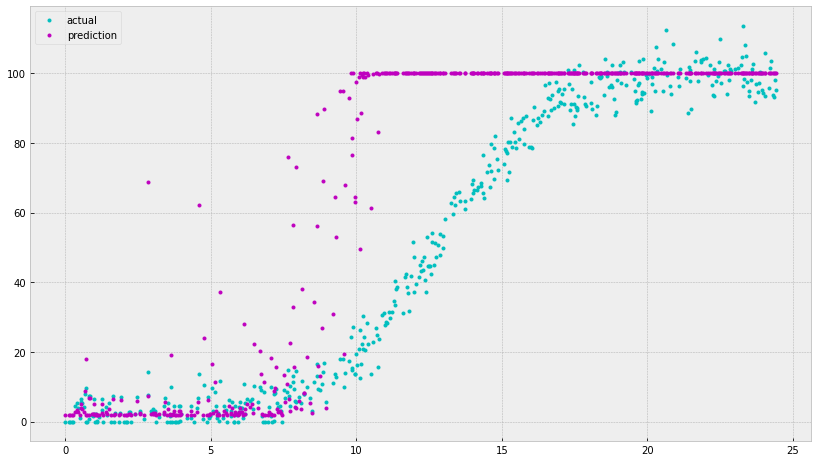

In [17]:
plt.plot(data['speed'], data['power'], 'c.', label='actual')
plt.plot(data['speed'], model.predict(data['power']), 'm.', label='prediction')
plt.legend();

In [19]:
# Evaluate the neural network on the test data.
model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 3ms/step - loss: 15.3964


15.396413803100586